In [4]:
import pandas as pd
import os


def process_fitness_files(folder_path):
    best_fitness_list = []
    mean_fitness_list = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            # Read the file, ignoring the first line
            data = pd.read_csv(file_path, sep="\s+", skiprows=1)
            best_fitness_list.append(data["best"])
            mean_fitness_list.append(data["mean"])

    if not best_fitness_list or not mean_fitness_list:
        raise ValueError("No valid data found in the provided folder path.")

    # Concatenate the lists into DataFrames
    best_fitness_df = pd.concat(best_fitness_list, axis=1)
    mean_fitness_df = pd.concat(mean_fitness_list, axis=1)

    # Calculate the required metrics for each iteration
    result = pd.DataFrame(
        {
            "iteration": best_fitness_df.index,
            "best_fitness_mean": best_fitness_df.mean(axis=1),
            "mean_fitness_mean": mean_fitness_df.mean(axis=1),
            "best_fitness_std": best_fitness_df.std(axis=1),
            "mean_fitness_std": mean_fitness_df.std(axis=1),
        }
    )

    # Sort the result by iteration number
    result.sort_values(by="iteration", inplace=True)

    return result


# Example usage:
# Update these paths with the actual folder paths
enemy_number = 1234
folder_path_1 = f"./single_island_optimization/test_logs/E{enemy_number}/"
folder_path_2 = f"./multi_island_optimization/test_logs/E{enemy_number}/"

# Process both folders
result_a = process_fitness_files(folder_path_1)
result_b = process_fitness_files(folder_path_2)

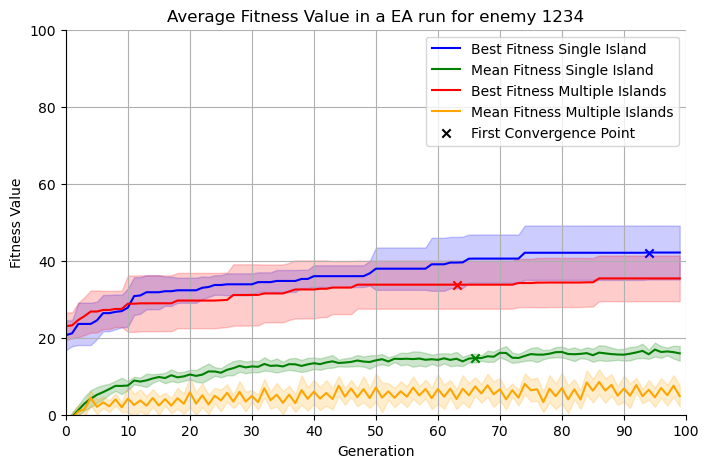

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to plot data with mean and standard deviation as filled area
def plot_with_std(ax, iterations, mean, std, label, color):
    ax.plot(iterations, mean, label=label, color=color)
    ax.fill_between(iterations, mean - std, mean + std, color=color, alpha=0.2)

# Define function to find the first convergence point
def find_first_convergence_point(data, window_size, threshold):
    for i in range(window_size, len(data)):
        window = data[i-window_size:i]
        if max(window) - min(window) < threshold and np.std(window) < (threshold / 2):
            return i
    return None

# Step 1: Extract data for plotting from Group A and Group B results
iterations_a = result_a['iteration']
best_fitness_mean_a = result_a['best_fitness_mean']
mean_fitness_mean_a = result_a['mean_fitness_mean']
best_fitness_std_a = result_a['best_fitness_std']
mean_fitness_std_a = result_a['mean_fitness_std']

iterations_b = result_b['iteration']
best_fitness_mean_b = result_b['best_fitness_mean']
mean_fitness_mean_b = result_b['mean_fitness_mean']
best_fitness_std_b = result_b['best_fitness_std']
mean_fitness_std_b = result_b['mean_fitness_std']

# Define convergence criteria
window_size = 20
threshold = 1

# Find the first convergence points
convergence_point_a_best = find_first_convergence_point(best_fitness_mean_a, window_size, threshold)
convergence_point_b_best = find_first_convergence_point(best_fitness_mean_b, window_size, threshold)
convergence_point_a_mean = find_first_convergence_point(mean_fitness_mean_a, window_size, threshold)
convergence_point_b_mean = find_first_convergence_point(mean_fitness_mean_b, window_size, threshold)

# Step 2: Plotting the data
fig, ax = plt.subplots(figsize=(8, 5))

# Plot for Group A
plot_with_std(ax, iterations_a, best_fitness_mean_a, best_fitness_std_a, label="Best Fitness Single Island", color='blue')
plot_with_std(ax, iterations_a, mean_fitness_mean_a, mean_fitness_std_a, label="Mean Fitness Single Island", color='green')

# Plot for Group B
plot_with_std(ax, iterations_b, best_fitness_mean_b, best_fitness_std_b, label="Best Fitness Multiple Islands", color='red')
plot_with_std(ax, iterations_b, mean_fitness_mean_b, mean_fitness_std_b, label="Mean Fitness Multiple Islands", color='orange')

# Mark the first convergence points with the same color as the lines
if convergence_point_a_best is not None:
    ax.scatter(iterations_a[convergence_point_a_best], best_fitness_mean_a[convergence_point_a_best], color='blue', marker='x')
if convergence_point_b_best is not None:
    ax.scatter(iterations_b[convergence_point_b_best], best_fitness_mean_b[convergence_point_b_best], color='red', marker='x')
if convergence_point_a_mean is not None:
    ax.scatter(iterations_a[convergence_point_a_mean], mean_fitness_mean_a[convergence_point_a_mean], color='green', marker='x')
if convergence_point_b_mean is not None:
    ax.scatter(iterations_b[convergence_point_b_mean], mean_fitness_mean_b[convergence_point_b_mean], color='orange', marker='x')

# Add a generic legend entry for the convergence points in black
ax.scatter([], [], color='black', marker='x', label='First Convergence Point')

# Step 3: Configure the plot
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness Value')
ax.set_title(f'Average Fitness Value in a EA run for enemy {enemy_number}')
ax.set_ylim(0, 100)
ax.set_xlim(result_a['iteration'].min(), result_a['iteration'].max())
ax.set_xticks(range(result_a['iteration'].min(), result_a['iteration'].max() + 10, 10))
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True)

# Display the plot
plt.show()